In [ ]:
#This project is part a series I am doing in trying to understand how sentiment on key issues rather than simple party preference can be used to understand where public opinion is. That is, rather than using % of Dems are favorable/unfavorable to policy x, find if there are ways to cluster people to get a sense of a type of person and how that person will approach policy x. The model will use KMeans clustering in order to identify three clusters of people. These clusters will be based upon how people feel about Trump himself as well as the direction of the country and party leadership in congress. I will use data from Pew Research Institute from March 2019. I begin by isolating just the responses to the four questions I will use to determine the clusters. I then have to map answers given as strings to intergers in order to cluster the results. I then use a KMeans classifier to determine three clusters (three because I want to explore the viability of liberal, convservative, and actual indendents). Interesting, there are several instances where the model gets a purer result than simply breaking people by party preference. After looking at the results, my sense is that there are people who do not identify as Dem or GOP but who will likely vote for one of the two major parties because of where they align on issues. The trick is being able to speak beyond a party's base.

#This project will utilize unsupervised machine learning to develop labels from an unlabeled dataset. 

In [ ]:
import savReaderWriter 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#reader_np = savReaderWriter.SavReaderNp("Mar19 public.sav")
#array = reader_np.to_structured_array("outfile.dat") 
#np.savetxt("outfile2.csv", array, delimiter=",")
#reader_np.close()

#df = pd.read_spss('Mar19 public.sav')
#df.to_csv("Mar19 public.csv", encoding = "utf-8-sig") These were no longer necessary after importing the sav file. Now that the file exists as a csv file, this now throws an error.

In [ ]:
data = pd.read_csv('Mar19 public.csv')
print(data.head())

In [ ]:
#print(data.iloc[1])
print(data.columns)
print(data['q2'].value_counts())
print(data['q1'].value_counts())

In [ ]:
#q10af1 asks about approve/dissaprove GOP leaders in congress; q10bf1 asks about Dem leaders in congress. I'm also going to check to make sure that each interviewee received both questions.
print(data['q10af1'].value_counts())
print(data['q10bf1'].value_counts())
print(data.iloc[5].q10af1)
print(data.iloc[5].q10bf1)


In [ ]:
#Let's see if we can get clusters using opinions on Trump and leaders in Congress and the direction of the country. q1 is about the country with Sat/Dis/DK. q2 is about trump with App/Dis/DK. I need to map these responses to intergers before clustering. I'm going to put Don't Know/Refused answer in the middle and fill in NaNs with the same number.

data_clust = data[['q1', 'q2', 'q10af1', 'q10bf1']]
data_clust['q1'] = data_clust['q1'].map({'Satisfied':0, 'Dissatisfied':2, '(VOL) Don\'t know/Refused':1})
data_clust['q2'] = data_clust['q2'].map({'Approve':0, 'Disapprove':2, '(VOL) Don\'t know/Refused':1})
data_clust['q10af1'] = data_clust['q10af1'].map({'Approve':0, 'Disapprove':2, '(VOL) Don\'t know/Refused':1})
data_clust['q10bf1'] = data_clust['q10bf1'].map({'Approve':0, 'Disapprove':2, '(VOL) Don\'t know/Refused':1})
questions = ['q1', 'q2', 'q10af1', 'q10bf1']
for i in questions:
    data_clust[i] = data_clust[i].fillna(1)

In [ ]:
# Here we see that the mapping worked and the strings (e.g., Approve) have been mapped to intergers which will allow me to use the KMeans classifier.
print(data_clust.value_counts())

In [ ]:
from matplotlib import pyplot as plt
plt.subplot()
plt.scatter(data_clust['q1'], data_clust['q2'], alpha=.005)
plt.xlabel('Country: Approve 0, Disapprove 1, NAN 2')
plt.ylabel('President: Satisfied 0, Unsatisfied 1, NAN 2')
plt.show()
data_clust

In [ ]:
from sklearn.cluster import KMeans
classifier = KMeans(n_clusters = 3)

classifier.fit(data_clust)
print(classifier.cluster_centers_)

In [ ]:
print(classifier.labels_)
cluster_zero = []
cluster_one = []
cluster_two = []

for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one.append(i)
    else:
        cluster_two.append(i)

#cluster_zero

In [ ]:
data_zero = data.iloc[cluster_zero]
data_one = data.iloc[cluster_one]
data_two = data.iloc[cluster_two]

In [ ]:
print(data_zero['q14f2'].value_counts())
print(cluster_zero[0:5])
print(data.iloc[2]['q14f2'])
print(data.iloc[17]['q14f2'])

In [ ]:
print(data_two['q14f2'].value_counts())
print(cluster_two[0:5])
print(data.iloc[8]['q14f2'])
print(data.iloc[16]['q14f2'])

In [ ]:
#This question is about Nancy Pelosi. Here we have a clear seperation between the opinions on Pelosi. This separation is not apparent on other questions which are more ambiguous in having a less clear partisan edge. After reviewing the breakdown on other questions, it looks like this correlation carries through the other questions. Cluster zero = More GOP, Cluster one = More Dem, Cluster two = Independent leaning GOP. It also became apparent that there were missing values that needed to be accounted for when calculating precentages. The missing values tended to show up in questions not about the parties in general or Trump but for questions on specific policies. 
print(data_zero['q14f2'].value_counts())
print(data_one['q14f2'].value_counts())
print(data_two['q14f2'].value_counts())

In [ ]:
#This question is about the being content with the federal government. It's interesting that each cluster is overwhelmingly frustrated by the federal government.
print(data_zero['q20'].value_counts())
print(data_one['q20'].value_counts())
print(data_two['q20'].value_counts())

In [ ]:
# q33af1 asks about the interviewee's impression of Trump's trustworthiness. The fact that the data shows such significant correlations in one direction seems to indicate that cluster_zero has grouped people favorable to Trump, cluster_one has grouped people strongly unfavorable, and cluster_two has grouped people with less polarized opinions. 
print(data_zero['q33af1'].dropna().value_counts()/len(data_zero['q33af1'].dropna())*100)
print(data_one['q33af1'].dropna().value_counts()/len(data_one['q33af1'].dropna())*100)
print(data_two['q33af1'].dropna().value_counts()/len(data_two['q33af1'].dropna())*100)


In [ ]:
# I want to see how these clusters respond to q44af1 which asks about funding for health care. 
print(data_zero['q44af1'].dropna().value_counts()/len(data_zero['q44af1'].dropna())*100)
print(data_one['q44af1'].dropna().value_counts()/len(data_one['q44af1'].dropna())*100)
print(data_two['q44af1'].dropna().value_counts()/len(data_two['q44af1'].dropna())*100)

In [ ]:
# q44nf2 is on education spending
print(data_zero['q44nf2'].dropna().value_counts()/len(data_zero['q44nf2'].dropna())*100)
print(data_one['q44nf2'].dropna().value_counts()/len(data_one['q44nf2'].dropna())*100)
print(data_two['q44nf2'].dropna().value_counts()/len(data_two['q44nf2'].dropna())*100)

In [ ]:
#So this question offers an interesting example of where group two falls on a partisan question about Democrats in Congress. Slightly more think that Dems in Congress do not keep their promises. It's interesting because the numbers on questions like this tend to be less polarized than other questions. The reason is that a Democrat might say that Democrats in Congress are not keeping promises not because they disagree with the policies but because they are not doing enough. 

print(data_zero['q47'].dropna().value_counts()/len(data_zero['q47'].dropna())*100)
print(data_one['q47'].dropna().value_counts()/len(data_one['q47'].dropna())*100)
print(data_two['q47'].dropna().value_counts()/len(data_two['q47'].dropna())*100)

In [ ]:
#Interesting that this question asks about having to choose the size of government. This is one of the few questions where cluster two come out more strongly for a conservative idea than cluster zero.

print(data_zero['q55f1'].dropna().value_counts()/len(data_zero['q55f1'].dropna())*100)
print(data_one['q55f1'].dropna().value_counts()/len(data_one['q55f1'].dropna())*100)
print(data_two['q55f1'].dropna().value_counts()/len(data_two['q55f1'].dropna())*100)

In [ ]:
#68a and 68b ask about feelings about Dem and Repub parties' feelings about religion, respectively. 

print(data_zero['q68a'].dropna().value_counts()/len(data_zero['q68a'].dropna())*100)
print(data_one['q68a'].dropna().value_counts()/len(data_one['q68a'].dropna())*100)
print(data_two['q68a'].dropna().value_counts()/len(data_two['q68a'].dropna())*100)

print('BREAK')

print(data_zero['q68b'].dropna().value_counts()/len(data_zero['q68b'].dropna())*100)
print(data_one['q68b'].dropna().value_counts()/len(data_one['q68b'].dropna())*100)
print(data_two['q68b'].dropna().value_counts()/len(data_two['q68b'].dropna())*100)


In [ ]:
print(data_zero['q69'].value_counts()/len(data_zero)*100)
print(data_one['q69'].value_counts()/len(data_one)*100)
print(data_two['q69'].value_counts()/len(data_two)*100)

In [ ]:
#Here's where the data gets really interesting. Although the clusters showed strong polization for certain questions, we se that these do not correlate to strong divisions on party preference. 

print(data_zero['party'].dropna().value_counts()/len(data_zero['party'].dropna())*100)
print(data_one['party'].dropna().value_counts()/len(data_one['party'].dropna())*100)
print(data_two['party'].dropna().value_counts()/len(data_two['party'].dropna())*100)

In [ ]:
#Now I want to see how these numbers compare to simply grouping by party. I'll start with Dem, Repub, and Ind.
party = data['party']
dem = []
gop = []
ind = []
for i in range(len(party)):
    if party[i] == 'Democrat':
        dem.append(i)
    elif party[i] == 'Republican':
        gop.append(i)
    elif party[i] == 'Independent':
        ind.append(i)
dem_data = data.iloc[dem]
gop_data = data.iloc[gop]
ind_data = data.iloc[ind]

In [ ]:
print(dem_data['q2'].dropna().value_counts()/len(dem_data['q2'].dropna())*100)
print(gop_data['q2'].dropna().value_counts()/len(gop_data['q2'].dropna())*100)
print(ind_data['q2'].dropna().value_counts()/len(ind_data['q2'].dropna())*100)
print('BREAK!!!!')
print(data_zero['q2'].dropna().value_counts()/len(data_zero['q2'].dropna())*100)
print(data_one['q2'].dropna().value_counts()/len(data_one['q2'].dropna())*100)
print(data_two['q2'].dropna().value_counts()/len(data_two['q2'].dropna())*100)

In [ ]:
print(data_zero['party'].value_counts()/len(data_zero['party'])*100)


In [ ]:
print(dem_data['party'].value_counts()/len(dem_data)*100)
print(gop_data['party'].value_counts()/len(gop_data)*100)
print(ind_data['party'].value_counts()/len(ind_data)*100)

In [ ]:
print(dem_data['q2'].value_counts()/len(dem_data)*100)
print(gop_data['q2'].value_counts()/len(gop_data)*100)
print(ind_data['q2'].value_counts()/len(ind_data)*100)

print('!!!!!! BREAK !!!!!!!')

print(data_zero['q2'].value_counts()/len(data_zero)*100)
print(data_one['q2'].value_counts()/len(data_one)*100)
print(data_two['q2'].value_counts()/len(data_two)*100)

In [ ]:
# healthcare q44af1. One interesting thing is that as we start to get into questions on policy, there are blanks in the dataset (NaN). This is strange considering there is an option for don't know or refused. To account for this, I'm going to start dropping the missing values for the analysis of each question.
print(dem_data['q44af1'].dropna().value_counts()/len(dem_data['q44af1'].dropna())*100)
print(gop_data['q44af1'].dropna().value_counts()/len(gop_data['q44af1'].dropna())*100)
print(ind_data['q44af1'].dropna().value_counts()/len(ind_data['q44af1'].dropna())*100)
print('BREAK!!!!')
print(data_zero['q44af1'].dropna().value_counts()/len(data_zero['q44af1'].dropna())*100)
print(data_one['q44af1'].dropna().value_counts()/len(data_one['q44af1'].dropna())*100)
print(data_two['q44af1'].dropna().value_counts()/len(data_two['q44af1'].dropna())*100)


In [88]:
questions=['qs1', 'q1', 'q2', 'q10af1', 'q10bf1', 'q14f2',
'q19', 'q20', 'q25', 'q33af1', 'q33bf1', 'q33cf1', 'q33df1', 'q33ff2',
'q33gf2', 'q33hf2', 'q33if2', 'q33jf2', 'q34f1', 'q44af1', 'q44bf1', 'q44cf1', 'q44ef1', 'q44ff1', 'q44gf1', 'q44hf2', 'q44if2', 'q44jf2', 'q44kf2', 'q44lf2', 'q44mf2', 'q44nf2', 'q47',  'q48f1', 'q49f2', 'q50a', 'q50b', 'q50c', 'q50d', 'q50a', 'q50b', 'q50c', 'q50d', 'q50e','q50ff1', 'q54f2', 'q55f1', 'q56f2', 'q57f2', 'q58', 'q60', 'q61a', 'q61b', 'q61c', 'q61df1', 'q61ef1', 'q61ff2', 'q61gf2', 'q61hf2', 'q61if1', 'q64', 'q65a', 'q65b', 'q65c', 'q65d', 'q65e', 'q66', 'q67', 'q68a', 'q68b', 'q68d', 'q69', 'q70', 'q70a', 'q71', 'q75', 'q76f1', 'q77f2', 'qi1', 'sex', 'age', 'educ', 'hisp', 'racecmb', 'racethn', 'birth_hisp', 'relig', 'chr', 'qf2', 'born', 'attend', 'income', 'reg','party', 'partyln', 'partysum', 'ideo', 'partyideo', 'partysumideo', 'hh1', 'hh3', 'adults', 'ql1', 'ql1a', 'qc1', 'll', 'cp', 'money2', 'weight']


for i in questions:
    print("In response to question " + i)
    print('GROUP ZERO - More GOP')
    print(data_zero[i].dropna().value_counts()/len(data_zero[i].dropna())*100)
    print('GROUP ONE - More Dem')
    print(data_one[i].dropna().value_counts()/len(data_one[i].dropna())*100)
    print('GROUP TWO - More Ind')
    print(data_two[i].dropna().value_counts()/len(data_two[i].dropna())*100)
    print('..................................................................................................................')


In response to question qs1
GROUP ZERO - More GOP
18 or older    100.0
Name: qs1, dtype: float64
GROUP ONE - More Dem
18 or older    100.0
Name: qs1, dtype: float64
GROUP TWO - More Ind
18 or older    100.0
Name: qs1, dtype: float64
..................................................................................................................
In response to question q1
GROUP ZERO - More GOP
Satisfied                   97.160243
(VOL) Don't know/Refused     2.839757
Name: q1, dtype: float64
GROUP ONE - More Dem
Dissatisfied                94.158554
(VOL) Don't know/Refused     4.450626
Satisfied                    1.390821
Name: q1, dtype: float64
GROUP TWO - More Ind
Dissatisfied                86.941581
(VOL) Don't know/Refused    13.058419
Name: q1, dtype: float64
..................................................................................................................
In response to question q2
GROUP ZERO - More GOP
Approve                     76.673428
Disapprove        

<AxesSubplot:>

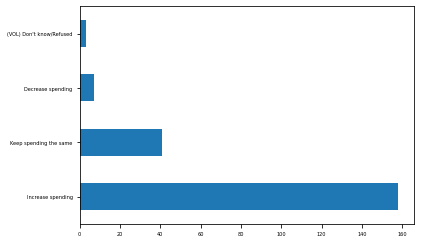

In [89]:
dem_data['q44af1'].dropna().value_counts().plot(kind='barh')


In [90]:
def graph_pew(question):
    dem_data[question].dropna().value_counts().plot(kind='barh')
    
   

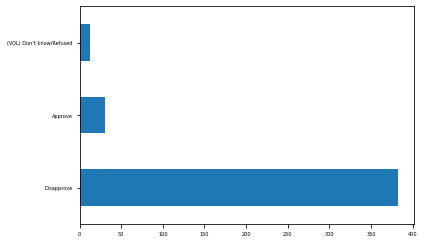

In [91]:
graph_pew('q2')

In [92]:
#print(dem_data['q2'].unique())
#print(dem_data['q2'].unique()[1])
print(dem_data['q33af1'].value_counts())
#print(dem_data['q33af1'].dropna().unique())
#print(dem_data['q33af1'].dropna().unique()[0])
w = dem_data['q33af1'].dropna().value_counts().to_frame()
labels = []
values = []
for i in range(len(w)):
    t = w.iloc[i]
    labels.append(t.name)
    values.append(t[0])
print(labels)
print(values)
print(len(w))
values/sum(values)


Not trustworthy             194
Trustworthy                  14
(VOL) Don't know/Refused      1
Name: q33af1, dtype: int64
['Not trustworthy', 'Trustworthy', "(VOL) Don't know/Refused"]
[194, 14, 1]
3


array([0.92822967, 0.06698565, 0.00478469])

<Figure size 1440x1440 with 0 Axes>

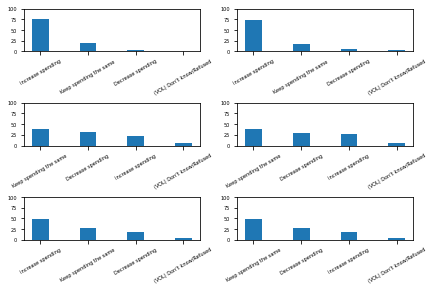

In [93]:
def graph_questions(question):
    gop = []
    dem = []
    ind = []
    cl1 = []
    cl2 = []
    cl0 = []
    gop_labels = []
    dem_labels = []
    ind_labels = []
    cl1_labels = []
    cl2_labels = []
    cl0_labels = []
    #Cluster zero = More GOP, Cluster one = More Dem, Cluster two = Independent leaning GOP. I need to keep this in mind when pairing the data in the graphs.
    data_sets = ['dem_data', 'gop_data', 'ind_data', 'cluster_zero', 'cluster_one', 'cluster_two']
    for i in data_sets:
        if i == 'dem_data':
            a = dem_data[question].dropna().value_counts().to_frame()
            for i in range(len(a)):
                b = a.iloc[i]
                dem_labels.append(b.name)
                dem.append(b[0])
        elif i == 'gop_data':
            a = gop_data[question].dropna().value_counts().to_frame()
            for i in range(len(a)):
                b = a.iloc[i]
                gop_labels.append(b.name)
                gop.append(b[0])
        elif i == 'ind_data':
            a = ind_data[question].dropna().value_counts().to_frame()
            for i in range(len(a)):
                b = a.iloc[i]
                ind_labels.append(b.name)
                ind.append(b[0])
        elif i == 'cluster_zero':
            a = data_zero[question].dropna().value_counts().to_frame()
            for i in range(len(a)):
                b = a.iloc[i]
                cl0_labels.append(b.name)
                cl0.append(b[0])
        elif i == 'cluster_one':
            a = data_one[question].dropna().value_counts().to_frame()
            for i in range(len(a)):
                b = a.iloc[i]
                cl1_labels.append(b.name)
                cl1.append(b[0])
        elif i == 'cluster_two':
            a = data_two[question].dropna().value_counts().to_frame()
            for i in range(len(a)):
                b = a.iloc[i]
                cl2_labels.append(b.name)
                cl2.append(b[0])
    gop = gop/sum(gop) * 100
    dem = dem/sum(dem) * 100
    ind = ind/sum(ind) * 100
    cl1 = cl1/sum(cl1) * 100
    cl2 = cl2/sum(cl2) * 100
    cl0 = cl0/sum(cl0) * 100
    x = np.arange(len(dem_labels)) 
    width = 0.35  
    
    fig = plt.figure(figsize=(20,20))
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
    plt.rcParams['font.size'] = 5
    
    ax1.bar(dem_labels, dem, width)
    ax1.set_xticklabels(dem_labels, rotation=30)
    ax1.axis([None, None, 0, 100])

    ax2.bar(cl1_labels, cl1, width)
    ax2.set_xticklabels(cl1_labels, rotation=30)
    ax2.axis([None, None, 0, 100])



    ax3.bar(gop_labels, gop,width)
    ax3.set_xticklabels(gop_labels, rotation=30)
    ax3.axis([None, None, 0, 100])


    ax4.bar(cl0_labels, cl0,width)
    ax4.set_xticklabels(cl0_labels, rotation=30)
    ax4.axis([None, None, 0, 100])

    ax5.bar(ind_labels, ind,width)
    ax5.set_xticklabels(ind_labels, rotation=30)
    ax5.axis([None, None, 0, 100])

    ax6.bar(cl2_labels, ind,width)
    ax6.set_xticklabels(cl2_labels, rotation=30)
    ax6.axis([None, None, 0, 100])


    fig.tight_layout()
    plt.show()



graph_questions('q44af1')

<Figure size 1440x1440 with 0 Axes>

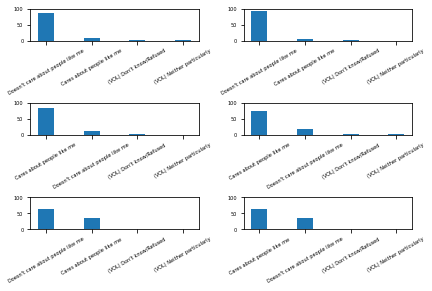

In [102]:
graph_questions('q33df1')


<Figure size 1440x1440 with 0 Axes>

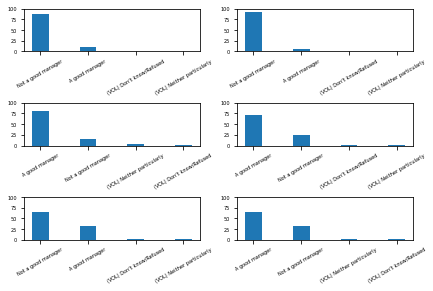

Democrat                    364
Independent                 289
Republican                   36
(VOL) No preference          16
(VOL) Don't know/Refused     12
(VOL) Other party             2
Name: party, dtype: int64


In [105]:
graph_questions('q33jf2')
print(data_one['party'].value_counts())